In [20]:
using Revise

# Loading the finite element package Amaru
using Amaru

In [30]:
# Mesh generation
blocks = [
    Block3D( [0 0 0; 0.2 2 0.3], nx=1, ny=5, nz=3, shape=HEX20),
]

msh = Mesh(blocks, verbose=true);

Mesh generation:
  analyzing 1 block(s)
  3D mesh             
    148 points obtained
     15 cells obtained
     46 faces obtained
     92 surface edges obtained
  done.


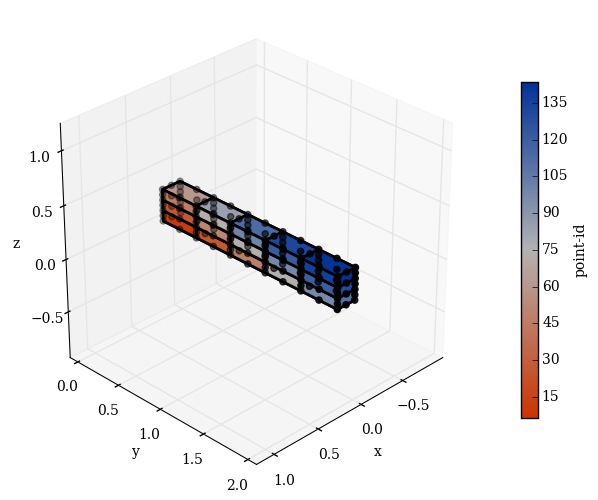

In [31]:
mplot(msh, field="point-id", pointmarkers=true)

In [32]:
# Finite element modeling

materials = [
    MaterialBind(:solids, ElasticSolid(E=2e10, nu=0.) ),
]

loggers = [
    Logger(:node, 1)  # monitor id 1
    GroupLogger(:ips, :(z<0.15))  # monitor id 1
]

domain = Domain(msh, materials, loggers);

Domain setup:
  3D domain general model      
    148 nodes
     15 elements
     46 faces
     92 edges
      1 materials
      2 loggers
  done.


In [33]:
# Define the boundary conditions
bcs = [
    BC(:node, :(y==0), :(ux=0, uy=0, uz=0) ),
#    BC(:face, :(y==2), :(tz=-5000/(0.2*0.3)) ),
    BC(:node, :(x==0   && y==2 && z==0.3), :(fz=-5000) ),
    BC(:node, :(x==0.2 && y==2 && z==0.3), :(fz=-5000) ),
]

# Perform the finite element analysis
solve!(domain, bcs, nincs=1, verbose=true)

save(domain, "dom1.vtk")

FEM analysis:
  unknown dofs: 390
  increment 1 from t=0.0 to t=1.0 (dt=1.0):
    it 1   residue: 2.7297e-08
  time spent: 0.0h 0.0m 0.451s
  file dom1.vtk written (Domain)


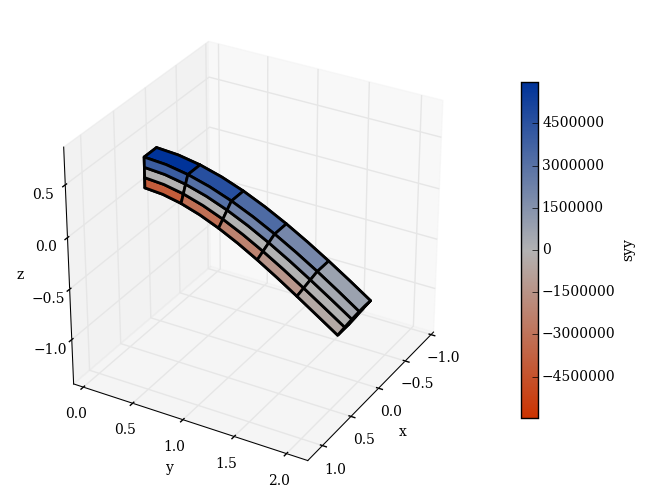

In [39]:
mplot(domain, field="syy", warpscale=300.0, elev=30, azim=30)

In [35]:
tab = loggers[2].book.tables[end]

Amaru.DTable with:
  data: Array{Array{Float64,1},1}, length 16
  dict: Dict{Symbol,Array{Float64,1}}

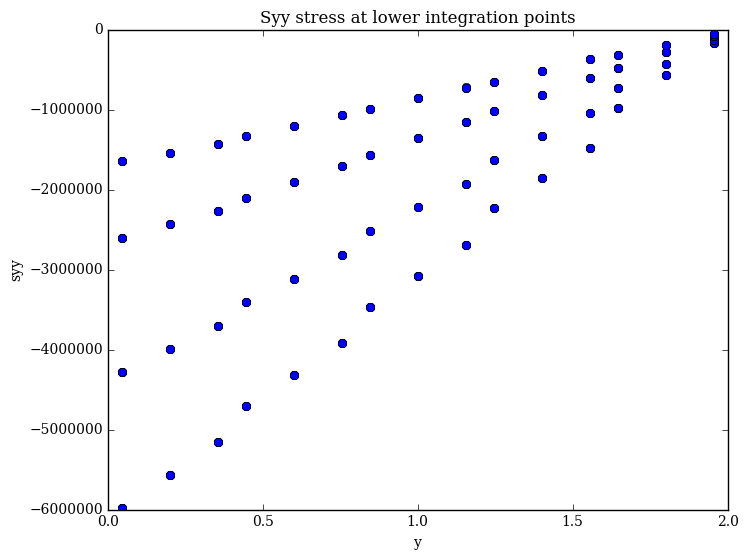

PyObject <matplotlib.text.Text object at 0x7fee33364210>

In [36]:
using PyPlot
plot(tab[:y], tab[:syy], "o")
xlabel("y")
ylabel("syy")
title("Syy stress at lower integration points")